# Image Blending using Pyramids

In this notebook, we will blend two images using `cv2.pyrUp()` and `cv2.pyrDown()`
<img src="../images/image_pyramid.png" width="700">

---

One application of Pyramids is Image Blending. For example, in image stitching, you will need to stack two images together, but it may not look good due to discontinuities between images. In that case, image blending with Pyramids gives you seamless blending without leaving much data in the images. One classical example of this is the blending of two fruits, Orange and Apple. See the result now itself to understand what I am saying:

<img src="../images/orapple.jpg" width="400">

Simply it is done as follows:
1. Load the two images of apple and orange
2. Find the Gaussian Pyramids for apple and orange (in this particular example, number of levels is 6)
3. From Gaussian Pyramids, find their Laplacian Pyramids
4. Now join the left half of apple and right half of orange in each levels of Laplacian Pyramids
5. Finally from this joint image pyramids, reconstruct the original image.

In [1]:
# For python2/3 compatibility
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

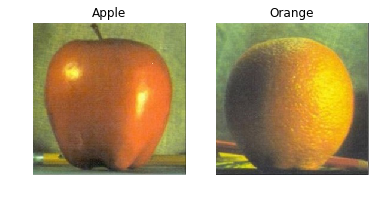

In [2]:
# Load images
A = cv2.cvtColor(cv2.imread('../images/apple.jpg'), cv2.COLOR_BGR2RGB)
B = cv2.cvtColor(cv2.imread('../images/orange.jpg'), cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1); plt.title('Apple'); plt.axis('off')
plt.imshow(A)
plt.subplot(1, 2, 2); plt.title('Orange'); plt.axis('off')
plt.imshow(B)

## 1. Generate Gaussian pyramids

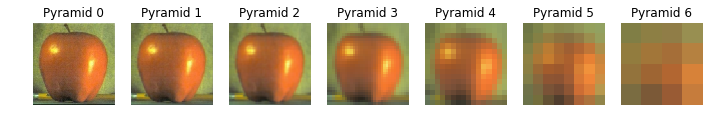

In [3]:
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)
    
plt.figure(figsize=(12, 12))
for i, gp in enumerate(gpA):
    plt.subplot(1, len(gpA), i+1); plt.title('Pyramid %d' % i); plt.axis('off');
    plt.imshow(gp)

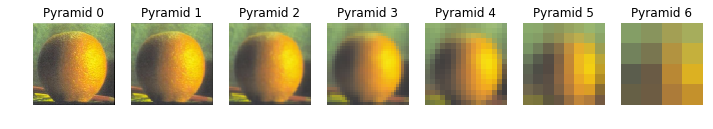

In [4]:
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)
    
plt.figure(figsize=(12, 12))
for i, gp in enumerate(gpB):
    plt.subplot(1, len(gpB), i+1); plt.title('Pyramid %d' % i); plt.axis('off');
    plt.imshow(gp)

## 2. Generate Laplacian pyramids

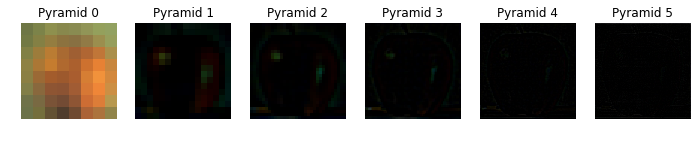

In [5]:
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)
    
plt.figure(figsize=(12, 12))
for i, lp in enumerate(lpA):
    plt.subplot(1, len(lpA), i+1); plt.title('Pyramid %d' % i); plt.axis('off');
    plt.imshow(lp)

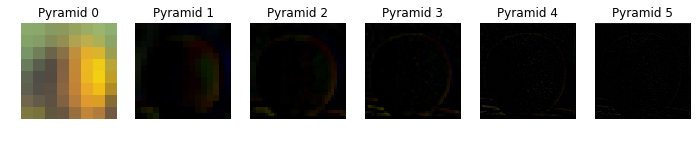

In [6]:
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)
    
plt.figure(figsize=(12, 12))
for i, lp in enumerate(lpB):
    plt.subplot(1, len(lpB), i+1); plt.title('Pyramid %d' % i); plt.axis('off');
    plt.imshow(lp)

## 3. Add left and right halves of images in each level

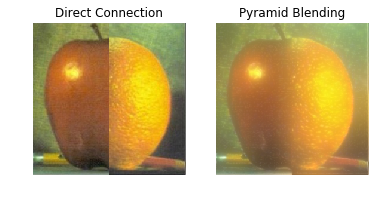

In [7]:
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))
    LS.append(ls)
    
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])
    
# image with direct connecting each half
real = np.hstack((A[:,:int(cols/2)],B[:,int(cols/2):]))
    
plt.subplot(1, 2, 1); plt.title('Direct Connection'); plt.axis('off')
plt.imshow(real)
plt.subplot(1, 2, 2); plt.title('Pyramid Blending'); plt.axis('off')
plt.imshow(ls_)

## Exercises

Let's make "Hand of Eye of Flame"!
<img src="../images/eye-hand1.jpg" width="400">


Example of reconstruct with mask
```python
LS = []
for i, (la,lb) in enumerate(zip(lpA,lpB)):
    gm = gpM[stage-i]
    masked_la = (la.astype('float') * (255.0 - gm.astype('float')) / 255.0).astype('uint8')
    masked_lb = (lb.astype('float') * gm.astype('float') / 255.0).astype('uint8')
    ls = masked_la + masked_lb
    LS.append(ls)
```

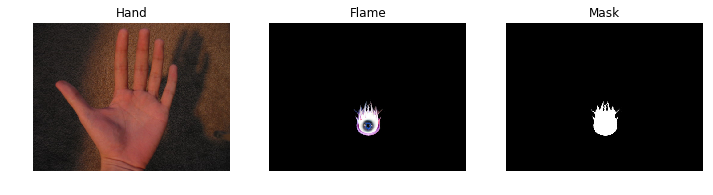

In [8]:
# Load images
A = cv2.cvtColor(cv2.imread('../images/hand.jpg'), cv2.COLOR_BGR2RGB)
B = cv2.cvtColor(cv2.imread('../images/eye-template.jpg'), cv2.COLOR_BGR2RGB)
M = np.expand_dims(cv2.imread('../images/eye-mask.jpg', 0), -1)
M = np.repeat(M, 3, axis=2)

plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1); plt.title('Hand'); plt.axis('off')
plt.imshow(A)
plt.subplot(1, 3, 2); plt.title('Flame'); plt.axis('off')
plt.imshow(B)
plt.subplot(1, 3, 3); plt.title('Mask'); plt.axis('off')
plt.imshow(M, cmap='gray')

In [9]:
# Your code here

### Reference

- [Image Pyramids - OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_pyramids/py_pyramids.html#py-pyramids)
- [Hand of Eye of Flame](http://www.cs.cmu.edu/afs/andrew/scs/cs/15-463/f06/pub/www/projects/proj3/fkg/)